In [6]:
import os
from six.moves import urllib

DS_EXTRACT_PATH = "UsersgabytOneDrive/Documentos/Trabajos UL/2023-2/IA/Bike-Sharing-Dataset.zip"
DS_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

def download_dataset(dataset_url=DS_URL, dataset_pc_path=DS_EXTRACT_PATH):
    if not os.path.isdir(dataset_pc_path):
        os.makedirs(dataset_pc_path)
    parts = os.path.split(dataset_url)
    zipname = parts[-1]
    zip_path = os.path.join(dataset_pc_path, zipname)
    urllib.request.urlretrieve(dataset_url, zip_path)

In [7]:
download_dataset()

Descomprimir los datos

In [17]:
from zipfile import ZipFile
import os

def unzip_dataset(dataset_pc_path="/UsersgabytOneDrive/Documentos/Trabajos UL/2023-2/IA/Bike-Sharing-Dataset.zip"):
    # Ruta completa del archivo ZIP
    zip_path = os.path.join(dataset_pc_path, "Bike-Sharing-Dataset.zip")

    # Directorio donde se extraerán los archivos
    extract_dir = dataset_pc_path

    # Descomprimir el archivo ZIP
    with ZipFile(zip_path, 'r') as zipObj:
        zipObj.extractall(extract_dir)

    # Eliminar el archivo ZIP
    os.remove(zip_path)


Cargar y explorar el dataset
hour.csv

dataset con pandas

In [1]:
import pandas as pd
import os

def load_bike_hourly_data(bike_dataset_path="/Users/gabyt/OneDrive/Documentos/Trabajos UL/2023-2/IA/Bike-Sharing-Dataset"):
 
    csv_path = os.path.join(bike_dataset_path, "/Users/gabyt/OneDrive/Documentos/Trabajos UL/2023-2/IA/Bike-Sharing-Dataset/hour.csv")

    df = pd.read_csv(csv_path)

    return df



primeras 48 filas

In [19]:
bike_data = load_bike_hourly_data()
print(bike_data.head(48))


    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  2011-01-01       1   0     1   0        0        6           0   
1         2  2011-01-01       1   0     1   1        0        6           0   
2         3  2011-01-01       1   0     1   2        0        6           0   
3         4  2011-01-01       1   0     1   3        0        6           0   
4         5  2011-01-01       1   0     1   4        0        6           0   
5         6  2011-01-01       1   0     1   5        0        6           0   
6         7  2011-01-01       1   0     1   6        0        6           0   
7         8  2011-01-01       1   0     1   7        0        6           0   
8         9  2011-01-01       1   0     1   8        0        6           0   
9        10  2011-01-01       1   0     1   9        0        6           0   
10       11  2011-01-01       1   0     1  10        0        6           0   
11       12  2011-01-01       1   0     1  11       

Despliegue de información escencial del dataset

In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [2]:
import matplotlib.pyplot as plt


first_10_days = bike_data[:240]


plt.figure(figsize=(12, 6))
plt.plot(first_10_days['dteday'], first_10_days['cnt'])
plt.xlabel('Fecha')
plt.ylabel('Número de manejadores de bicicleta')
plt.title('Número de manejadores de bicicleta en los primeros 10 días')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


NameError: name 'bike_data' is not defined

distribución del dataset


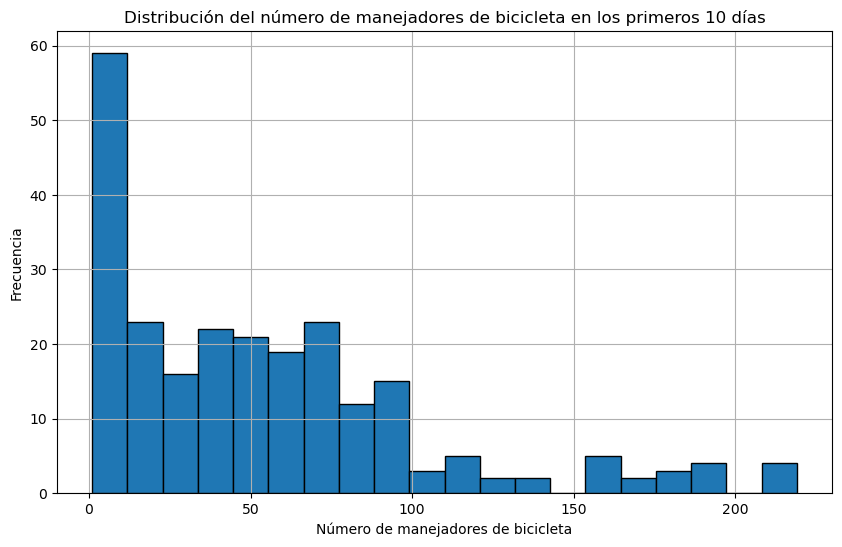

In [22]:
import matplotlib.pyplot as plt

first_10_days = bike_data[:240]

plt.figure(figsize=(10, 6))
plt.hist(first_10_days['cnt'], bins=20, edgecolor='black')
plt.xlabel('Número de manejadores de bicicleta')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de manejadores de bicicleta en los primeros 10 días')
plt.grid(True)
plt.show()


In [ ]:
dummy_columns = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

dummy_data = pd.get_dummies(bike_data, columns=dummy_columns)

columns_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']

processed_data = dummy_data.drop(columns_to_drop, axis=1)

escalar el Dataset

In [24]:
to_scale = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

scaled_features = {}

for each in to_scale:
    mean, std = processed_data[each].mean(), processed_data[each].std()
    scaled_features[each] = [mean, std]
    processed_data.loc[:, each] = (processed_data[each] - mean) / std


NameError: name 'processed_data' is not defined

Separar el dataset en Training y Test


In [25]:
from sklearn.model_selection import train_test_split

# Campos de Test
campos_test = ['cnt', 'casual', 'registered']

# Campos de Train
campos_train = [col for col in processed_data.columns if col not in campos_test]

# Separar los datos en características (X) y variables objetivo (y)
X = processed_data[campos_train]
y = processed_data[campos_test]

# Separar en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'processed_data' is not defined

Entrenamiento


In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

n_neighbors = 4
n_jobs = 4
regressor = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=n_jobs)

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_test_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)


NameError: name 'X_train' is not defined

In [30]:
import pickle

# Nombre de archivo para guardar el modelo
filename = 'knn_regressor_model.pkl'

# Guardar el modelo en un archivo
pickle.dump(regressor, open(filename, 'wb'))

print("Modelo guardado exitosamente en", filename)


Modelo guardado exitosamente en knn_regressor_model.pkl


 Cargar el Modelo


In [31]:
import pickle

filename = 'knn_regressor_model.pkl'


loaded_model = pickle.load(open(filename, 'rb'))

predictions = loaded_model.predict(X_test)

print("Predicciones del modelo cargado:", predictions)


NameError: name 'X_test' is not defined

Realizar predicciones

In [32]:
# Realizar predicciones utilizando el modelo cargado
predictions = loaded_model.predict(X_test)

# Imprimir las predicciones
print("Predicciones del modelo cargado:", predictions)


NameError: name 'X_test' is not defined

Evaluar el modelo por medio de métricas


In [34]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, predictions)


print("Error medio cuadrado en el conjunto de prueba:", mse)


NameError: name 'y_test' is not defined


Graficar los resultados de la predicción vs los resultados de las pruebas

In [4]:

fig, ax = pyplot.subplots(figsize=(30,15))

ax.plot(prediction[:,0], label='Prediction')
ax.plot(Ytest.cnt.values, label='Data')
ax.set_xlim(right=len(prediction))
ax.legend()

dates = pd.to_datetime(bikeshare.loc[Ytest.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=90)

NameError: name 'pyplot' is not defined